In [1]:
import math

import numpy as np

import DTLearner as dt
import LinRegLearner as lrl
from gen_data import best_4_lin_reg, best_4_dt

In [2]:
def compare_os_rmse(learner1, learner2, x, y):
    """
    Compares the out-of-sample root mean squared error of your LinRegLearner and DTLearner.

    :param learner1: An instance of LinRegLearner
    :type learner1: class:'LinRegLearner.LinRegLearner'
    :param learner2: An instance of DTLearner
    :type learner2: class:'DTLearner.DTLearner'
    :param x: X data generated from either gen_data.best_4_dt or gen_data.best_4_lin_reg
    :type x: numpy.ndarray
    :param y: Y data generated from either gen_data.best_4_dt or gen_data.best_4_lin_reg
    :type y: numpy.ndarray
    :return: The root mean squared error of each learner
    :rtype: tuple
    """
    # compute how much of the data is training and testing
    train_rows = int(math.floor(0.6 * x.shape[0]))
    test_rows = x.shape[0] - train_rows

    # separate out training and testing data
    train = np.random.choice(x.shape[0], size=train_rows, replace=False)
    test = np.setdiff1d(np.array(range(x.shape[0])), train)
    train_x = x[train, :]
    train_y = y[train]
    test_x = x[test, :]
    test_y = y[test]

    # train the learners
    learner1.add_evidence(train_x, train_y)  # train it
    learner2.add_evidence(train_x, train_y)  # train it

    # evaluate learner1 out of sample
    pred_y = learner1.query(test_x)  # get the predictions
    rmse1 = math.sqrt(((test_y - pred_y) ** 2).sum() / test_y.shape[0])

    # evaluate learner2 out of sample
    pred_y = learner2.query(test_x)  # get the predictions
    rmse2 = math.sqrt(((test_y - pred_y) ** 2).sum() / test_y.shape[0])

    return rmse1, rmse2


In [3]:
def test_lr(seed):
    # create two learners and get data
    lrlearner = lrl.LinRegLearner(verbose=False)
    dtlearner = dt.DTLearner(verbose=False, leaf_size=1)
    x, y = best_4_lin_reg(seed=seed)

    # compare the two learners
    rmse_lr, rmse_dt = compare_os_rmse(lrlearner, dtlearner, x, y)

    # share results
    if rmse_lr < 0.9 * rmse_dt:
        return 1
    else:
        print("LR >= 0.9 DT:  fail") 
        return -1

In [4]:
def test_dt(seed):
    lrlearner = lrl.LinRegLearner(verbose=False)
    dtlearner = dt.DTLearner(verbose=False, leaf_size=1)
    x, y = best_4_dt()
    
    # compare the two learners
    rmse_lr, rmse_dt = compare_os_rmse(lrlearner, dtlearner, x, y)
    
    if rmse_dt < 0.9 * rmse_lr:
        return 1
    else:
        print("DT >= 0.9 LR:  fail")
        return -1

# Linear Regression

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [6]:
lin_data = {"X": np.arange(0, 20),
       "y": np.arange(0, 20)}

toy_lin_df = pd.DataFrame(data=lin_data)

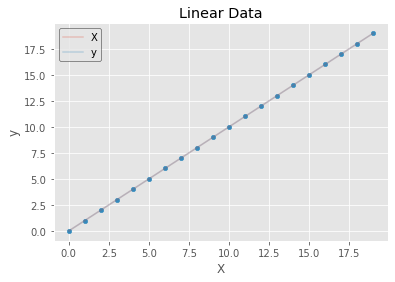

In [7]:
ax = toy_lin_df.plot.scatter(title='Linear Data', x='X', y='y')
toy_lin_df.plot(ax=ax, alpha=0.25)
ax.legend(loc="best", markerscale=1.1, 
          frameon=True, edgecolor="black")
plt.savefig("Linear Data.png")

# Decision Tree

In [34]:
n_rows = 100

dt_y = np.full(shape=(n_rows, ), fill_value=10.0)
dt_X = np.random.rand(n_rows)

dt_y[np.where(dt_X < 0.25)] = 0
dt_y[np.where(dt_X > 0.75)] = -8


In [35]:
dt_data = {"X":dt_X, "y":dt_y}
toy_dt_df = pd.DataFrame(data=dt_data)

for i in range(dt_X.shape[0]):
    toy_dt_df.iloc[i]['y'] += np.random.uniform(-1, 1, 1)

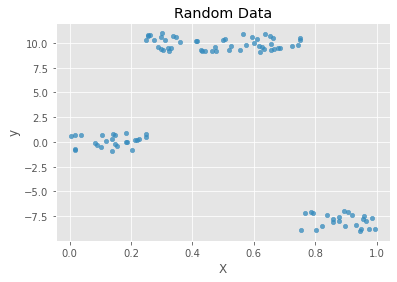

In [36]:
dt_ax = toy_dt_df.plot.scatter(x='X', y='y',title='Random Data', legend=False, alpha=0.75)
# plt.savefig("Linear Data.png")

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=5)

In [ ]:
t = pd.DataFrame(data={"X1":X[:, 0], "y": y})
t2 = pd.DataFrame(data={"X2":X[:, 1], "y": y})

In [ ]:
t1 = t.plot.scatter(title='Decision Tree', x="X1", y="y")
t2.plot.scatter(ax=t1, x='X2', y='y')

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X, y)
dt_pred = dt.predict(X)

lr = lrl.LinRegLearner()
lr.add_evidence(X, y)
lr_pred = lr.query(X)

In [ ]:
temp_df = pd.DataFrame(data={"Decision Tree Prediction": dt_pred,
                            "Linear Reg Prediction": lr_pred})


In [ ]:
t = pd.DataFrame(data={"X1":X[:, 0], "y": y})
t2 = pd.DataFrame(data={"X2":X[:, 1], "y": y})